# Bài tập thực hành: Trực quan hóa dữ liệu Super Sale

# Bài tập 1: Phân tích danh mục bán chạy nhất

Câu chuyện dữ liệu:

- Ban quản trị muốn biết danh mục sản phẩm nào đang bán chạy nhất trong quý vừa qua. Hãy sử dụng dữ liệu Super Sale để trực quan hóa tổng doanh thu theo từng danh mục.

Yêu cầu:

- Tạo biểu đồ cột (Bar Chart) thể hiện tổng doanh thu theo danh mục.

- Ghi chú danh mục bán chạy nhất và thấp nhất.

- Tính tỷ lệ doanh thu của danh mục bán chạy nhất so với tổng doanh thu.

## Hướng dẫn giải bt1:

## 1. Import thư viện, chuẩn bị dữ liệu

Tên Sinh Viên: Trầm Tiểu Mi 
Mã Số Sinh Viên: 22133034 


In [23]:
pip install xlrd
pip install openpyxl
pip install seaborn



   ---------------------------------------- 293.3/293.3 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import xlrd
data = pd.read_excel('Global Superstore.xls')



## 2. Tính tổng doanh thu theo danh mục

In [2]:
category_sales = data.groupby('Category')['Sales'].sum().sort_values(ascending=False)

## 3. Vẽ biểu đồ cột:

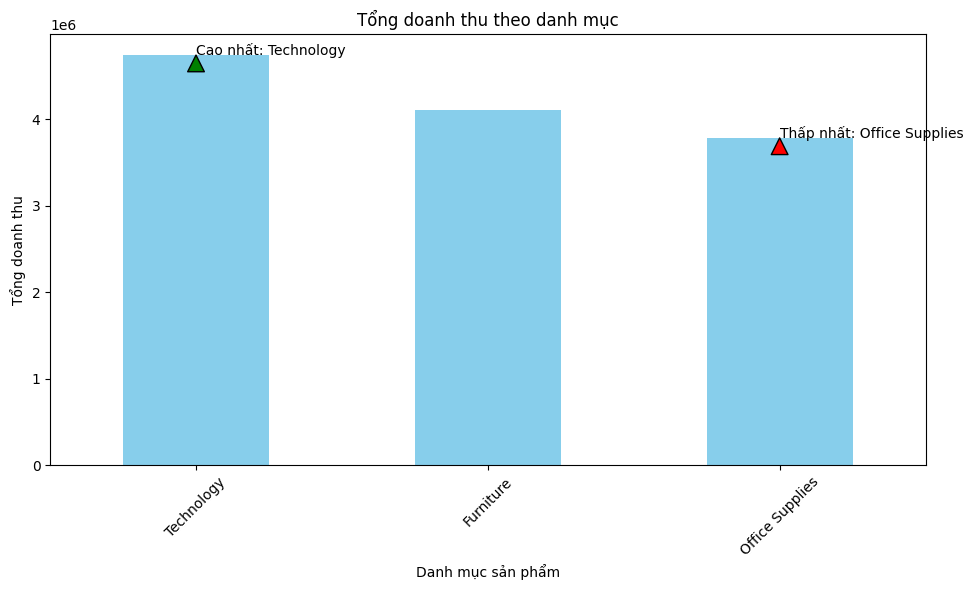

In [3]:
plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar', color='skyblue')
plt.title('Tổng doanh thu theo danh mục')
plt.xlabel('Danh mục sản phẩm')
plt.ylabel('Tổng doanh thu')
plt.xticks(rotation=45)

# Ghi chú danh mục bán chạy nhất và thấp nhất
max_category = category_sales.idxmax()
min_category = category_sales.idxmin()
plt.annotate(f'Cao nhất: {max_category}', xy=(0, category_sales.max()), xytext=(0, category_sales.max() + 5000), arrowprops=dict(facecolor='green', shrink=0.05))
plt.annotate(f'Thấp nhất: {min_category}', xy=(len(category_sales)-1, category_sales.min()), xytext=(len(category_sales)-1, category_sales.min() + 3000), arrowprops=dict(facecolor='red', shrink=0.05))

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

## 4. Tính tỷ lệ doanh thu của danh mục bán chạy nhất:

In [4]:
top_category_ratio = (category_sales.max() / category_sales.sum()) * 100
print(f'Danh mục bán chạy nhất chiếm: {top_category_ratio:.2f}% tổng doanh thu.')

Danh mục bán chạy nhất chiếm: 37.53% tổng doanh thu.


# Bài tập 2: Xu hướng doanh thu theo thời gian

Câu chuyện dữ liệu:

- Ban quản lý muốn xem xét xu hướng doanh thu qua các tháng trong năm để đánh giá sự tăng giảm doanh thu theo thời gian. Hãy trực quan hóa xu hướng doanh thu trong năm qua.

Yêu cầu:

- Vẽ biểu đồ đường (Line Chart) thể hiện doanh thu theo từng tháng.

- Thể hiện xu hướng doanh thu tăng, giảm qua các giai đoạn.

- Xác định tháng doanh thu cao nhất và thấp nhất.



Tháng có doanh thu cao nhất: December với 1580780.772699991 VND
Tháng có doanh thu thấp nhất: February với 543739.3799200014 VND


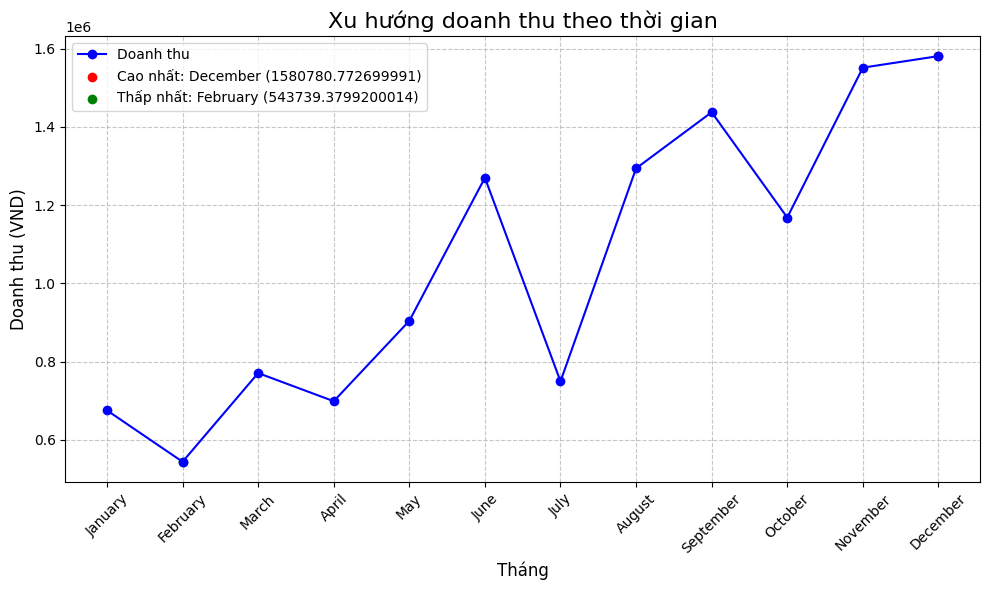

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel('Global Superstore.xls')

# Chuyển cột 'Order Date' thành kiểu datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Tạo cột 'Month' từ cột 'Order Date'
data['Month'] = data['Order Date'].dt.month_name()

# Tính tổng doanh thu theo từng tháng
df = data.groupby('Month')['Sales'].sum().reset_index()

# Thêm cột 'Month_Number' để sắp xếp đúng thứ tự tháng
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['Month_Number'] = df['Month'].apply(lambda x: month_order.index(x) + 1)

# Sắp xếp dữ liệu theo 'Month_Number'
df = df.sort_values('Month_Number')

# Xác định tháng có doanh thu cao nhất và thấp nhất
max_revenue = df['Sales'].max()
min_revenue = df['Sales'].min()

max_month = df[df['Sales'] == max_revenue]['Month'].values[0]
min_month = df[df['Sales'] == min_revenue]['Month'].values[0]

print(f"Tháng có doanh thu cao nhất: {max_month} với {max_revenue} VND")
print(f"Tháng có doanh thu thấp nhất: {min_month} với {min_revenue} VND")

# Vẽ biểu đồ doanh thu 
plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['Sales'], marker='o', linestyle='-', color='b', label='Doanh thu')

plt.title('Xu hướng doanh thu theo thời gian', fontsize=16)
plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Doanh thu (VND)', fontsize=12)

# Mark tháng cao nhất và thấp nhất
plt.scatter(max_month, max_revenue, color='red', label=f'Cao nhất: {max_month} ({max_revenue})')
plt.scatter(min_month, min_revenue, color='green', label=f'Thấp nhất: {min_month} ({min_revenue})')

plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Biểu đồ
plt.tight_layout()
plt.show()


# Bài tập 3: Phân bố doanh thu giữa các khu vực

Câu chuyện dữ liệu:

- Doanh nghiệp muốn biết doanh thu đang tập trung nhiều nhất tại khu vực nào. Việc hiểu rõ phân bố doanh thu giữa các khu vực sẽ giúp doanh nghiệp tập trung đầu tư hiệu quả hơn.

Yêu cầu:

- Vẽ biểu đồ tròn (Pie Chart) thể hiện tỷ lệ doanh thu theo từng khu vực.

- Ghi rõ tỷ lệ phần trăm doanh thu của khu vực cao nhất.

Khu vực có doanh thu cao nhất: Central với 22.32% tổng doanh thu


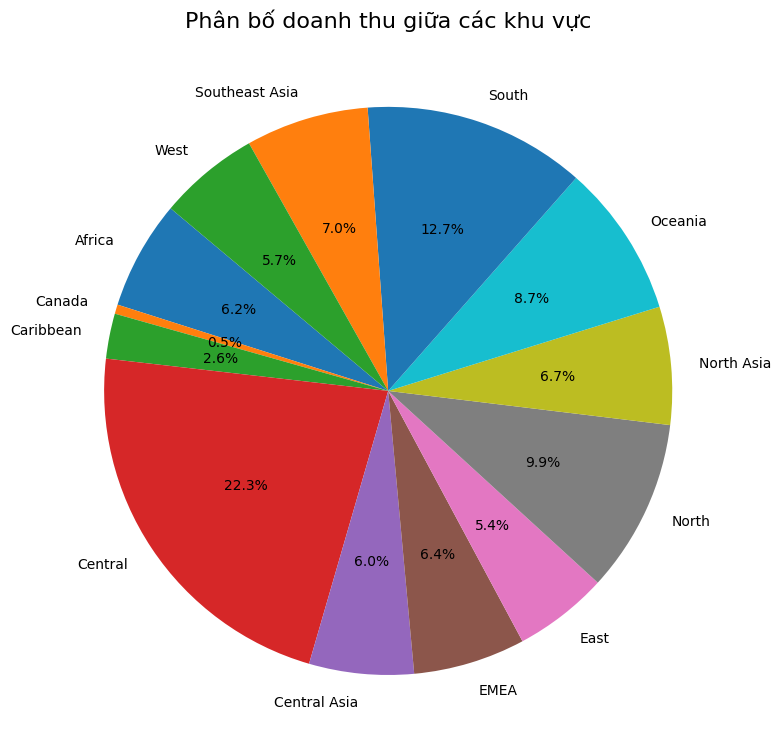

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file Excel
data = pd.read_excel('Global Superstore.xls')

# Tính tổng doanh thu theo từng khu vực
region_revenue = data.groupby('Region')['Sales'].sum().reset_index()

# Tính tỷ lệ phần trăm doanh thu theo khu vực
region_revenue['Percentage'] = (region_revenue['Sales'] / region_revenue['Sales'].sum()) * 100

# Xác định khu vực có doanh thu cao nhất
max_revenue = region_revenue['Sales'].max()
max_region = region_revenue[region_revenue['Sales'] == max_revenue]['Region'].values[0]
max_percentage = region_revenue[region_revenue['Sales'] == max_revenue]['Percentage'].values[0]

print(f"Khu vực có doanh thu cao nhất: {max_region} với {max_percentage:.2f}% tổng doanh thu")

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(region_revenue['Sales'], labels=region_revenue['Region'], autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)

# Thêm tiêu đề
plt.title('Phân bố doanh thu giữa các khu vực', fontsize=16)

# Biểu đồ
plt.tight_layout()
plt.show()


# Bài tập 4: Phân tích mối quan hệ giữa doanh thu và lợi nhuận

Câu chuyện dữ liệu:

- Ban quản trị muốn biết liệu doanh thu cao có tương đồng với lợi nhuận cao hay không. Việc tìm ra mối quan hệ này sẽ giúp đề ra chiến lược kinh doanh phù hợp.

Yêu cầu:

- Vẽ biểu đồ phân tán (Scatter Plot) thể hiện mối quan hệ giữa doanh thu và lợi nhuận.

- Nhận xét xem có mối quan hệ tuyến tính hay không.

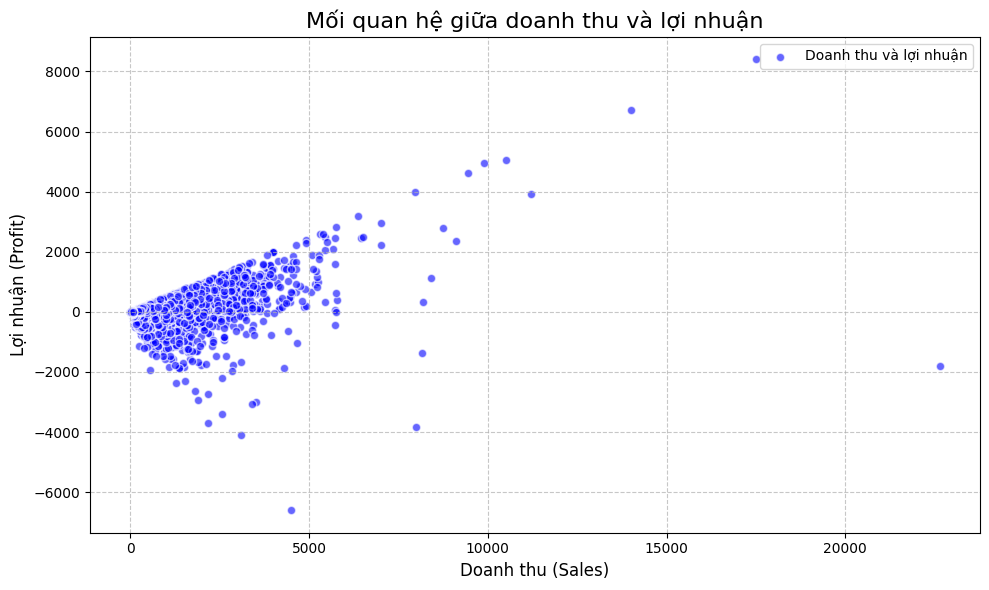

Hệ số tương quan giữa doanh thu và lợi nhuận: 0.48
Không có mối quan hệ tuyến tính rõ ràng giữa doanh thu và lợi nhuận.


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file Excel
data = pd.read_excel('Global Superstore.xls')

# Trích xuất cột 'Sales' và 'Profit'
sales = data['Sales']
profit = data['Profit']

# Vẽ biểu đồ phân tán
plt.figure(figsize=(10, 6))
plt.scatter(sales, profit, alpha=0.6, c='blue', edgecolors='w', label='Doanh thu và lợi nhuận')

# Thêm tiêu đề và nhãn
plt.title('Mối quan hệ giữa doanh thu và lợi nhuận', fontsize=16)
plt.xlabel('Doanh thu (Sales)', fontsize=12)
plt.ylabel('Lợi nhuận (Profit)', fontsize=12)

# Lưới và chú thích
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Biểu đồ
plt.tight_layout()
plt.show()

# Nhận xét
correlation = sales.corr(profit)
print(f"Hệ số tương quan giữa doanh thu và lợi nhuận: {correlation:.2f}")
if correlation > 0.5:
    print("Có mối quan hệ tuyến tính dương giữa doanh thu và lợi nhuận.")
elif correlation < -0.5:
    print("Có mối quan hệ tuyến tính âm giữa doanh thu và lợi nhuận.")
else:
    print("Không có mối quan hệ tuyến tính rõ ràng giữa doanh thu và lợi nhuận.")


# Bài tập 5: So sánh chi phí vận chuyển giữa các danh mục sản phẩm

Câu chuyện dữ liệu:

- Các danh mục sản phẩm khác nhau thường có chi phí vận chuyển khác nhau. Việc so sánh chi phí này giúp ban quản lý đề ra chiến lược giảm chi phí.

Yêu cầu:

- Vẽ biểu đồ hộp (Box Plot) thể hiện phân bố chi phí vận chuyển giữa các danh mục sản phẩm.

- Tìm danh mục có chi phí vận chuyển cao nhất và thấp nhất.

Danh mục có chi phí vận chuyển cao nhất: Technology với chi phí trung bình 50.00 VND
Danh mục có chi phí vận chuyển thấp nhất: Office Supplies với chi phí trung bình 12.96 VND


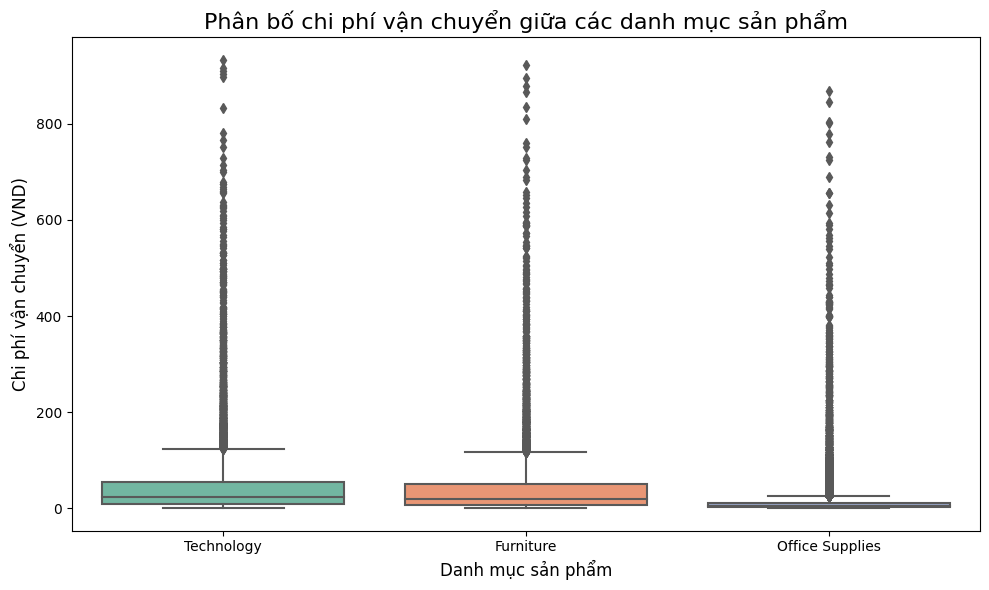

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ file Excel
data = pd.read_excel('Global Superstore.xls')

# Trích xuất cột 'Category' và 'Shipping Cost'
category_shipping = data[['Category', 'Shipping Cost']]

# Tính trung bình chi phí vận chuyển theo từng danh mục
avg_shipping_cost = category_shipping.groupby('Category')['Shipping Cost'].mean().reset_index()

# Xác định danh mục có chi phí vận chuyển cao nhất và thấp nhất
max_shipping = avg_shipping_cost['Shipping Cost'].max()
min_shipping = avg_shipping_cost['Shipping Cost'].min()

max_category = avg_shipping_cost[avg_shipping_cost['Shipping Cost'] == max_shipping]['Category'].values[0]
min_category = avg_shipping_cost[avg_shipping_cost['Shipping Cost'] == min_shipping]['Category'].values[0]

print(f"Danh mục có chi phí vận chuyển cao nhất: {max_category} với chi phí trung bình {max_shipping:.2f} VND")
print(f"Danh mục có chi phí vận chuyển thấp nhất: {min_category} với chi phí trung bình {min_shipping:.2f} VND")

# Vẽ biểu đồ hộp (Box Plot) để so sánh phân bố chi phí vận chuyển
plt.figure(figsize=(10, 6))
sns.boxplot(data=category_shipping, x='Category', y='Shipping Cost', palette='Set2')

# Tiêu đề và nhãn
plt.title('Phân bố chi phí vận chuyển giữa các danh mục sản phẩm', fontsize=16)
plt.xlabel('Danh mục sản phẩm', fontsize=12)
plt.ylabel('Chi phí vận chuyển (VND)', fontsize=12)

# Biểu đồ
plt.tight_layout()
plt.show()


# Bài tập 6: Đánh giá hiệu suất của từng nhân viên bán hàng

Câu chuyện dữ liệu:

- Ban quản lý muốn biết nhân viên nào có doanh thu cao nhất để khen thưởng và nhân viên có doanh thu thấp để hỗ trợ thêm.

Yêu cầu:

- Vẽ biểu đồ cột ngang (Horizontal Bar Chart) thể hiện tổng doanh thu của từng nhân viên.

- Xác định top 3 nhân viên có doanh thu cao nhất.

- Đánh giá mức chênh lệch doanh thu giữa nhân viên cao nhất và thấp nhất.



In [40]:
#Không có trường liên quan về nhân viên như ID Nhân viên hay Tên Nhân Viên

# Bài tập 7: Phân tích sự khác biệt giữa các phương thức thanh toán

Câu chuyện dữ liệu:

- Doanh nghiệp muốn biết phương thức thanh toán nào được khách hàng ưa chuộng nhất.

Yêu cầu:

- Vẽ biểu đồ cột nhóm (Grouped Bar Chart) thể hiện số lượng đơn hàng theo từng phương thức thanh toán.

- Đưa ra nhận xét về xu hướng sử dụng các phương thức thanh toán.

- Đề xuất phương án thúc đẩy phương thức ít được sử dụng.

In [41]:
# không có trường/bộ thể hiện phương thức thanh toán 

# Bài tập 8: Tìm hiểu hành vi mua sắm của khách hàng qua phân khúc

Câu chuyện dữ liệu:

- Ban lãnh đạo muốn hiểu rõ hành vi mua sắm của các phân khúc khách hàng (Doanh nghiệp, Cá nhân, Chính phủ).

Yêu cầu:

- Vẽ biểu đồ cột xếp chồng (Stacked Bar Chart) thể hiện doanh thu theo từng phân khúc khách hàng.

- Đánh giá phân khúc nào đóng góp lớn nhất.

- Đưa ra nhận xét về tiềm năng của các phân khúc khác.

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')


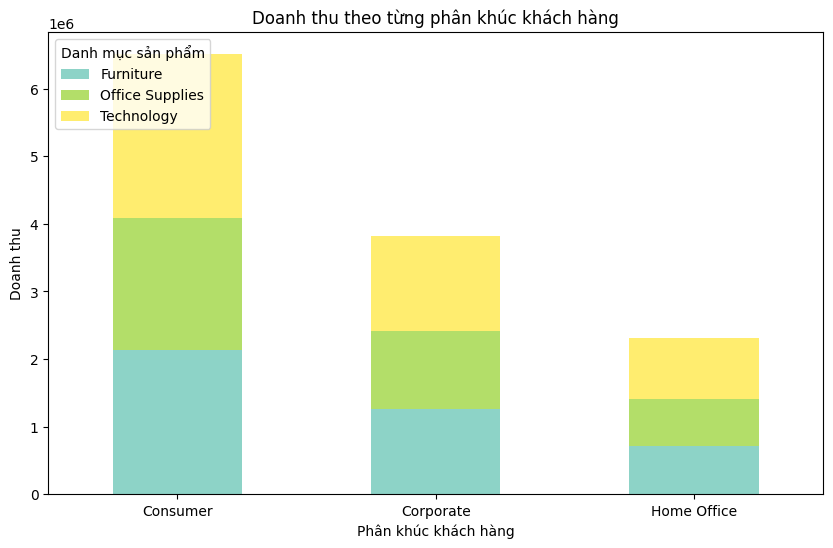

Phân khúc đóng góp lớn nhất là: Consumer với tổng doanh thu 6,507,949.42


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file Excel
data = pd.read_excel('Global Superstore.xls')

print(data.columns)

# Tính tổng doanh thu theo phân khúc và danh mục sản phẩm
segment_sales = data.groupby(['Segment', 'Category'])['Sales'].sum().unstack(fill_value=0)

# Vẽ biểu đồ cột xếp chồng
segment_sales.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set3')
plt.title('Doanh thu theo từng phân khúc khách hàng')
plt.xlabel('Phân khúc khách hàng')
plt.ylabel('Doanh thu')
plt.xticks(rotation=0)
plt.legend(title='Danh mục sản phẩm', loc='upper left')
plt.show()

# Đánh giá phân khúc đóng góp lớn nhất
total_sales_per_segment = segment_sales.sum(axis=1).reset_index()
top_segment = total_sales_per_segment.loc[total_sales_per_segment[0].idxmax()]

print(f"Phân khúc đóng góp lớn nhất là: {top_segment['Segment']} với tổng doanh thu {top_segment[0]:,.2f}")


Phân khúc "Corporate" (Doanh nghiệp) có đóng góp lớn nhất vào doanh thu, đặc biệt từ danh mục Technology.
Phân khúc "Home Office" có doanh thu thấp hơn nhưng có thể tiềm năng nếu tăng cường chiến lược khuyến mãi hoặc tiếp cận khách hàng tốt hơn.

# Bài tập 9: Phân tích đơn hàng bị hoàn trả

Câu chuyện dữ liệu:

- Ban quản lý muốn giảm thiểu số lượng đơn hàng bị hoàn trả bằng cách phân tích lý do và số lượng đơn hoàn trả.

Yêu cầu:

- Vẽ biểu đồ cột (Bar Chart) thể hiện số lượng đơn hàng bị hoàn trả theo từng lý do.

- Xác định lý do phổ biến nhất.

- Đề xuất biện pháp giảm thiểu đơn hàng hoàn trả.

In [42]:
# Không có trường hay bộ liên quan đến hoàn trả hàng hóa 

# Bài tập 10: Đánh giá sản phẩm mang lại lợi nhuận cao nhất

Câu chuyện dữ liệu:

- Ban lãnh đạo muốn xác định sản phẩm mang lại lợi nhuận cao nhất để tập trung sản xuất và kinh doanh.

Yêu cầu:

- Vẽ biểu đồ cột (Bar Chart) thể hiện lợi nhuận theo từng sản phẩm.

- Đánh giá sản phẩm có lợi nhuận cao nhất và thấp nhất.

- Đề xuất chiến lược kinh doanh dựa trên kết quả.

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')


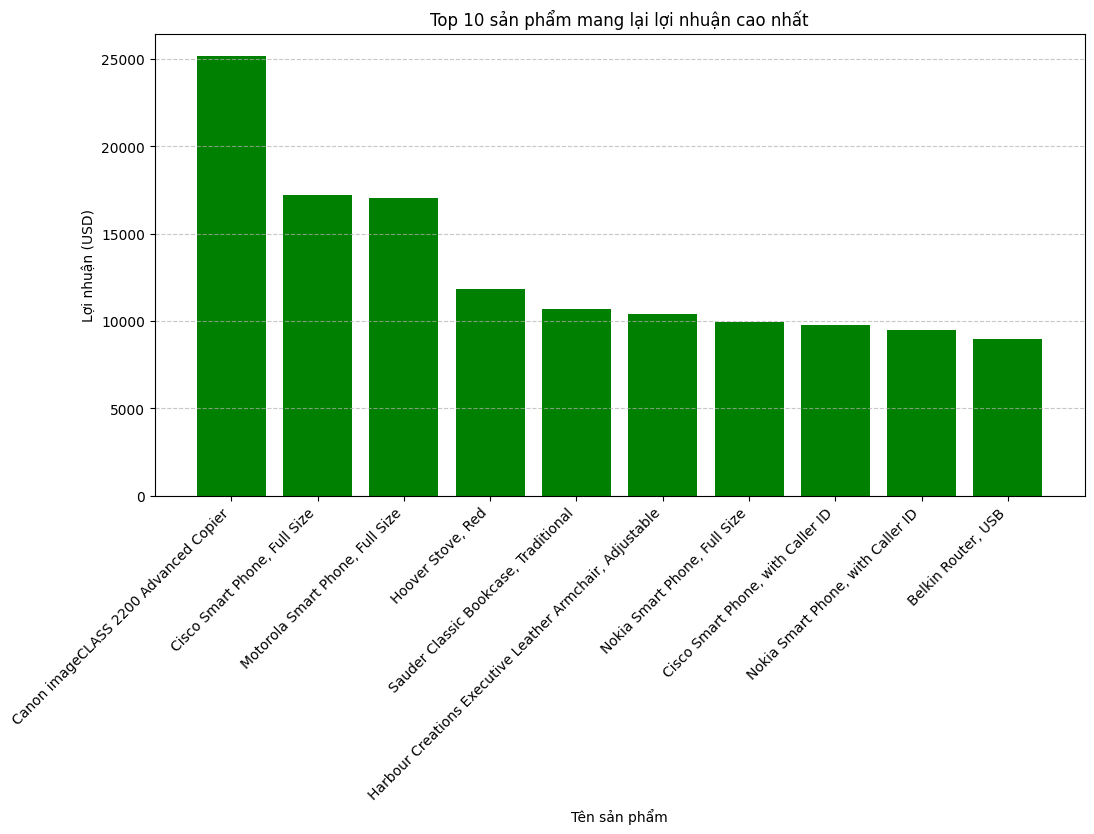

Sản phẩm có lợi nhuận cao nhất: Canon imageCLASS 2200 Advanced Copier với lợi nhuận: 25199.927999999993
Sản phẩm có lợi nhuận thấp nhất: Cubify CubeX 3D Printer Double Head Print với lợi nhuận: -8879.970400000002


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel('Global Superstore.xls')
print(data.columns)

# Tính tổng lợi nhuận cho từng sản phẩm
profit_per_product = data.groupby('Product Name')['Profit'].sum().reset_index()

# Sắp xếp sản phẩm theo lợi nhuận
profit_per_product = profit_per_product.sort_values(by='Profit', ascending=False)

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
plt.bar(profit_per_product['Product Name'][:10], profit_per_product['Profit'][:10], color='green')
plt.title('Top 10 sản phẩm mang lại lợi nhuận cao nhất')
plt.xlabel('Tên sản phẩm')
plt.ylabel('Lợi nhuận (USD)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Xác định sản phẩm có lợi nhuận cao nhất và thấp nhất
max_profit_product = profit_per_product.iloc[0]
min_profit_product = profit_per_product.iloc[-1]

print(f"Sản phẩm có lợi nhuận cao nhất: {max_profit_product['Product Name']} với lợi nhuận: {max_profit_product['Profit']}")
print(f"Sản phẩm có lợi nhuận thấp nhất: {min_profit_product['Product Name']} với lợi nhuận: {min_profit_product['Profit']}")



Đề xuất chiến lược kinh doanh:
- Tăng cường sản xuất và kinh doanh sản phẩm có lợi nhuận cao nhất.
- Xem xét lý do sản phẩm có lợi nhuận thấp nhất, có thể là do giá bán, chi phí sản xuất, hoặc nhu cầu thấp.
- Tập trung vào marketing các sản phẩm lợi nhuận cao và tìm cách cải thiện sản phẩm có lợi nhuận thấp.